## STAT 207 Lab 12: Regularized Linear Regression

Due: Wednesday, May 6, 23:59:59

### minhcao2 AND Michael Cao 

#### The code below generates data to analyze in this lab. 

The response variable is 'y'. The other variables are feature variables. Run the code and then work on the questions below.

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import norm, t
import matplotlib.pyplot as plt
import seaborn as sb; sb.set()

In [2]:
b0 = 17.3
bvec = np.repeat([1, -1, 0.15, 0], [4, 2, 3, 23])
n = 150
nX = bvec.size
X = t.rvs(size=n*nX, loc=10, scale=2.5, df=6, random_state=1).reshape((n, nX))
Xnames = []
for i in range(nX):
    list.append(Xnames, 'X'+str(i+1))
df = pd.DataFrame(X, columns=Xnames)
df['y'] = b0 + np.matmul(X, bvec) + t.rvs(df=5, scale=5.7, random_state=13, size=n)

### Part 1: Data Summary and Visualization (8 pts)

**a) (2 pts)** Use the .describe() function to compute summary statistics for all the feature variables and the response. Comment on whether or not the feature variables have widely varying standard deviations or similar standard deviations. Some of our variable selection methods work better if the scales of the feature variables are similar to each other.

In [3]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,X26,X27,X28,X29,X30,X31,X32,y
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,9.927516,9.672206,9.827706,9.980261,9.613107,10.107092,9.703299,9.674936,10.224194,10.039294,...,10.018971,9.805344,9.759456,10.046996,9.565271,9.849641,10.019706,10.146526,10.211818,41.965212
std,3.022367,3.128528,2.803113,2.922390,2.847218,3.081909,2.668704,2.801009,2.945952,3.345381,...,2.751667,3.108416,2.642744,3.042646,2.945139,2.937049,2.974315,3.314347,2.948996,9.740258
min,-3.493133,-0.211723,0.929926,-0.634442,-0.692340,-3.609361,0.010210,1.725515,-2.833697,-3.995182,...,3.577089,-2.955298,2.324880,-3.611018,2.969740,-1.523011,0.474820,1.733413,0.051699,14.650897
25%,8.089146,7.501608,8.286204,8.142708,7.869755,8.258094,8.281414,7.875670,8.880848,8.141887,...,8.139202,8.015356,8.002739,8.234073,7.833637,8.255389,8.242057,8.139922,8.700384,35.106183
50%,10.178137,9.978406,10.101535,10.138785,9.797717,9.804287,9.765363,9.907172,10.207325,9.761149,...,9.950892,10.014644,9.832070,10.310754,9.539543,9.873912,10.063159,10.017180,10.219836,41.705526
75%,11.720538,11.763074,11.774162,11.715377,11.064819,11.865759,11.167208,11.304363,11.405933,11.932534,...,12.008818,11.447037,11.546189,11.832517,11.298953,11.519136,12.064943,12.130275,11.942326,47.389015
max,18.855323,20.521743,17.740586,19.666872,17.975048,21.757740,15.946676,18.066252,26.721873,22.743389,...,19.178044,19.462822,17.391591,19.586861,19.171904,17.642756,18.029959,25.116210,19.474205,73.676405


In [6]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,X26,X27,X28,X29,X30,X31,X32,y
0,15.261250,7.543098,7.970773,5.415610,10.914943,8.565230,9.033689,11.733897,9.385160,14.600989,...,5.444990,11.325942,7.850875,19.586861,10.921050,11.859945,12.058796,9.372276,8.997377,35.089959
1,10.507227,11.759343,13.007035,11.850835,10.095002,8.597800,11.696141,9.017233,10.084688,10.988113,...,12.128168,7.694838,12.004999,11.207174,8.890172,8.071047,8.931837,12.453282,9.816475,69.715006
2,8.668538,9.460572,13.865577,10.374676,10.938932,16.096844,10.761202,10.527714,13.202317,10.930243,...,3.577089,6.484959,9.466277,9.991703,7.714535,17.642756,10.139209,11.391926,7.816795,44.135425
3,10.492958,12.812401,10.698198,12.665292,11.568467,13.166865,9.537697,11.144326,10.041551,8.686830,...,12.203646,9.540746,7.622554,7.267387,8.936340,-1.523011,13.865486,8.934622,10.060588,41.821333
4,9.529107,11.923139,12.069086,5.311639,10.439717,12.471839,5.357008,4.377699,11.408174,5.013244,...,12.984102,10.882825,9.150179,14.755608,6.920305,8.483852,7.388411,9.604214,10.275105,49.969993


Same standard deviation

**b) (2 pts)** Plot a histogram or distribution plot of the response variable, y.

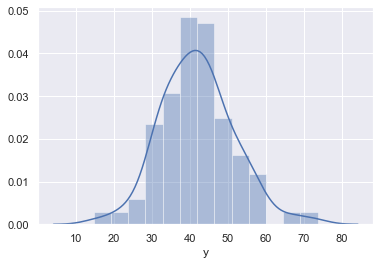

In [5]:
sb.distplot(df['y'])


In [7]:
corrxy = df.corr()['y'][:len(df.columns)-1]
corrxy.shape

(32,)

**c) (2 pts)** Plot all the sample correlation coefficients between X variables and y in one scatter plot with the column number on the horizontal axis and correlation on the vertical axis. Include a horizontal line at 0 for reference. 

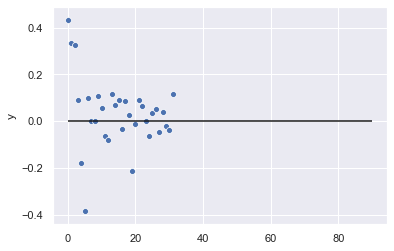

In [8]:
sb.scatterplot(np.arange(np.size(corrxy)), corrxy)
plt.hlines(y=0, xmin=0, xmax=90)
plt.show()

**d) (2 pts)** Interpret correlation plot: comment on whether any of the feature variables appear linearly associated with y. Which ones and why, based on what you see in the graph?

No

### Part 2: Compare OLS and Lasso regression (12 pts)

**a) (3 pts)** Extract the feature matrix X and target y from the data frame. Create a train test split of the data with 10% in the test data and 90% in the training data. 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
import pandas as pd

In [15]:
y = df['y']
X = df.drop(columns='y')
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.10, random_state=42)

**b) (3 pts)** Fit the OLS linear regression model with all of the feature varaibles to the training data. Then use the training model to predict the test data responses. Make a scatter the test data y values versus their predicted values (let's call them yhat0) computed from the training model.

In [16]:
clf0 = LinearRegression()
clf0.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
yhat0 = clf0.predict(X_test)

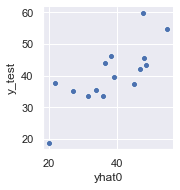

In [20]:
sb.pairplot(data=
            pd.DataFrame({'y_test': y_test, 
                          'yhat0': yhat0}), 
            y_vars='y_test', x_vars=['yhat0'
                                    
                                    
                                    ])
plt.show()

**c) (3 pts)** Use the Lasso (L1 regularized) to fit a linear regression model with all of the feature variables to the training data. Set the penalty parameter alpha=2. Then use the training model to predict the test data responses. Make a scatter the test data y values versus their predicted values (let's call them yhat1) computed from the training model.

In [17]:
clf1 = Lasso(alpha=2, max_iter=1000)
clf1.fit(X_train, y_train)

Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [19]:
yhat1 = clf1.predict(X_test)

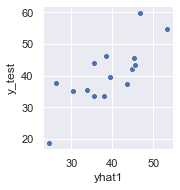

In [22]:
sb.pairplot(data=
            pd.DataFrame({'y_test': y_test, 
                          'yhat1': yhat1}), 
            y_vars='y_test', x_vars=['yhat1'
                                    
                                    
                                    ])
plt.show()

**d) (2 pts)** Compute and compare the **test** coefficients of determination ($R^2$) for the two models. Which model performed better? 

In [23]:
print("Test R-square for OLS: ", clf0.score(X_test, y_test))
print("Test R-square for Lasso: ", clf1.score(X_test, y_test))

Test R-square for OLS:  0.45496258883628604
Test R-square for Lasso:  0.563830351836379


Both are pretty low, but we see that the Lasso has substantially outperformed OLS based on the test R-square scores.

**e) (1 pt)** List all of the feature variables that have nonzero coefficient estimates in the Lasso trained model.

In [33]:
clf1.coef_[clf1.coef_ > 0]

array([0.81432743, 0.88597302, 1.19627139, 0.3883589 , 0.07116985,
       0.05807395, 0.08504154])

### Part 3: Cross-validation (5 pts)

**a) (2 pts)** Use 10-fold cross-validation to compute the average test mean square error (MSE) and its standard error for the OLS linear regression of y on all the feature variables.

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
modclass0 = LinearRegression()
scores0 = cross_val_score(modclass0, X, y, cv=10, 
                          scoring="neg_mean_squared_error")
print("CV MSE scores:", -scores0)
print("Average MSE:", round(-scores0.mean(), 2))
print("Std. error:", round(scores0.std()/np.sqrt(len(scores0)), 2))

CV MSE scores: [66.1995267  78.98654045 39.86489595 57.57861022 38.32194866 86.90848484
 57.04190057 57.57093084 48.44626984 57.15161018]
Average MSE: 58.81
Std. error: 4.63


**b) (2 pts)** Use 10-fold cross-validation to compute the average test mean square error (MSE) and its standard error for the Lasso linear regression model with alpha = 2 and using all of the feature variables.

In [36]:
modclass1 = Lasso(alpha=0.3, max_iter=1000)
scores1 = cross_val_score(modclass1, X, y, cv=5, 
                          scoring="neg_mean_squared_error")
print("CV MSE scores:", -scores1)
print("Average MSE:", round(-scores1.mean(), 2))
print("Std. error:", round(scores1.std()/np.sqrt(len(scores1)), 2))

CV MSE scores: [62.12369537 49.8295149  56.87439976 50.06438711 49.37951739]
Average MSE: 53.65
Std. error: 2.26


**c) (1 pt)** According to the average MSE criterion how do the two models compare? Which one is better and how big is the difference, say, compared to the standard errors.

In [38]:
diff_in_MSE = 58.81 - 53.65
diff_in_std = 4.63 - 2.26
diff_in_MSE, diff_in_std

(5.160000000000004, 2.37)

We see that L1 penalized regression has better predictive accuracy in this example than OLS regression